In [10]:
import numpy as np
import pandas as pd
# Replace 'matrix.txt' with the path to your file

matrix = np.loadtxt('/teamspace/studios/this_studio/notebooks/lower_triangular_gt.txt')
first_15_rows = np.array(pd.read_csv("First_15_rows.csv"))

print(matrix)

print(first_15_rows)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
def build_prior_knowledge(matrix,first_15_rows):
    n = matrix.shape[1]
    prior_knowledge = np.full((n, n), -1)
    for i in range(n):
        for j in range(n):
            if j<=i:
                prior_knowledge[i][j]=matrix[i][j]
            if i<15:
                prior_knowledge[i][j]=first_15_rows[i][j]

    return prior_knowledge

In [12]:
prior_knowledge_1 = build_prior_knowledge(matrix,first_15_rows)
print(prior_knowledge_1)

[[ 0  1  1 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0 -1 -1]
 [ 0  0  0 ...  0  0 -1]
 [ 0  0  0 ...  0  0  0]]


In [13]:
high_scrap = pd.read_csv("dataset/high_scrap.csv")
low_scrap = pd.read_csv("dataset/low_scrap.csv")

X = pd.concat([high_scrap, low_scrap])
# normalizing
X = (X - X.min()) / (X.max() - X.min())

# including previous knowledge as a matrix
# prior knowledge matrix that have as many rows and columns as the number of columns in the dataset with values -1
n = X.shape[1]
prior_knowledge = np.full((n, n), -1)
# create an array length of number of columns and have as values the number of the station
station = np.zeros(n)
for i in range(n):
    station[i] = X.columns[i][7]

# fill the matrix with value 0 when the station is the same
for i in range(len(station)):
    for j in range(len(station)):
        if station[i] > station[j]:
            prior_knowledge[i][j] = 0

print(prior_knowledge)

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 0  0  0 ... -1 -1 -1]
 [ 0  0  0 ... -1 -1 -1]
 [ 0  0  0 ... -1 -1 -1]]


In [18]:
for i in range(n):
    for j in range(n):
        if prior_knowledge_1[i][j] == -1:
            prior_knowledge_1[i][j]=prior_knowledge[i][j]

In [20]:
df = pd.DataFrame(prior_knowledge_1)
df.to_csv("prior_knowledge.csv",index= False)
df = pd.DataFrame(prior_knowledge)
df.to_csv("prior_knowledge_1.csv",index= False)


In [53]:
df=pd.DataFrame(prior_knowledge)
df.to_csv("prior_knowledge.csv",index=False)

In [6]:
print(model.adjacency_matrix_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
def modify_adj_matrix(matrix_model,prior_knowledge):
    n = prior_knowledge.shape[1]
    for i in range(n):
        for j in range(n):
            if prior_knowledge[i][j]==-1:
                prior_knowledge[i][j]=matrix[i][j]
   
    return prior_knowledge


In [8]:
final_matrix = modify_adj_matrix(model.adjacency_matrix_,prior_knowledge)

In [9]:
print(final_matrix)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


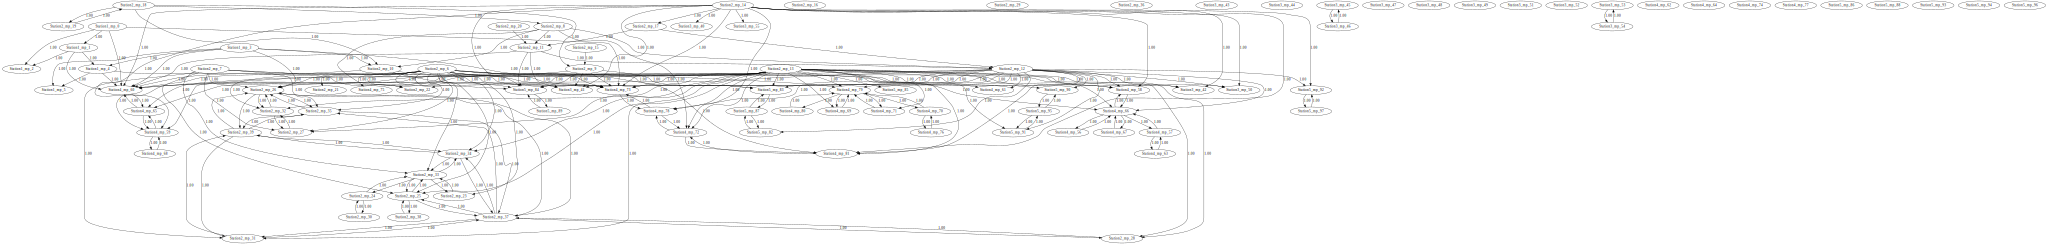

In [11]:
make_dot(final_matrix, labels=list(X.columns))